In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("Intership.csv")

In [3]:
data.head(10)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [4]:
#data validation
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
data.shape

(200, 5)

In [6]:
#Missing value calculation
data.shape[0]-data.count()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [7]:
data.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [8]:
#Type error
data.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [9]:
update_col=['srno','tv','radio','newsapaper','sales']
update_col

['srno', 'tv', 'radio', 'newsapaper', 'sales']

In [10]:
data.columns=update_col

In [11]:
data.head()

,srno,tv,radio,newsapaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [12]:
#Box plot

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
import warnings
warnings.filterwarnings("ignore")

<Axes: >

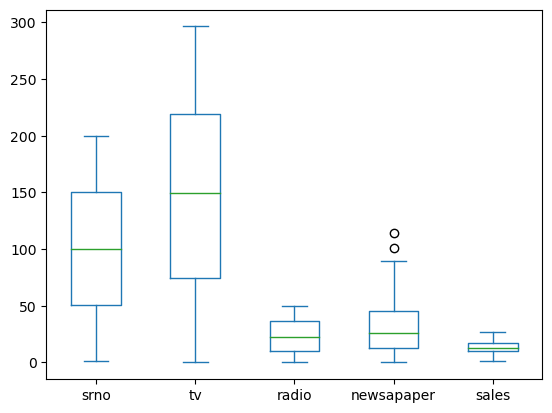

In [15]:
data.plot(kind="box")

<Figure size 800x800 with 0 Axes>

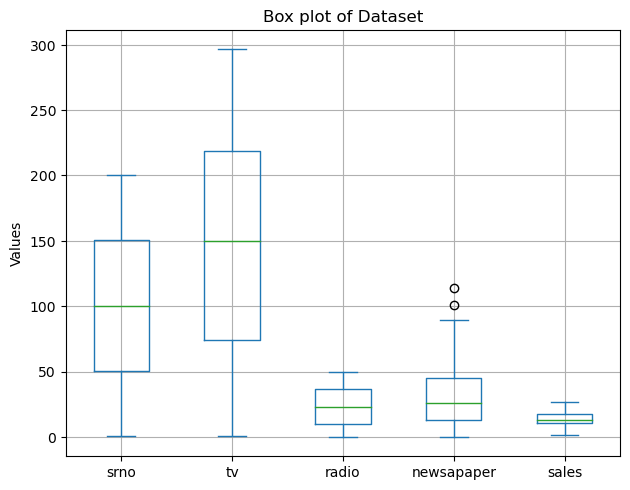

In [16]:
plt.figure(figsize=(8,8))
data.plot(kind="box")
plt.ylabel("Values")
plt.tight_layout()
plt.title(f"Box plot of Dataset")
plt.grid()
plt.show()

In [17]:
number=50
print(number)

50


In [18]:
print(f" number is {number} my lucky number is {number}")

 number is 50 my lucky number is 50


In [19]:
#remove outliers
data.newsapaper

0      69.2
1      45.1
2      69.3
3      58.5
4      58.4
       ... 
195    13.8
196     8.1
197     6.4
198    66.2
199     8.7
Name: newsapaper, Length: 200, dtype: float64

In [20]:
upper_acceptable_value=data["newsapaper"].quantile(0.99)
print(f"upper_acceptable_value{upper_acceptable_value}")
data[data["newsapaper"]>upper_acceptable_value]

upper_acceptable_value89.5149999999999


,srno,tv,radio,newsapaper,sales
16,17,67.8,36.6,114.0,12.5
101,102,296.4,36.3,100.9,23.8


In [21]:
md=data["newsapaper"].median()
print(f"median value of newsapaper is {md}")
data.loc[data["newsapaper"]>upper_acceptable_value]=md

median value of newsapaper is 25.75


In [22]:
data[data["newsapaper"]>upper_acceptable_value]

,srno,tv,radio,newsapaper,sales


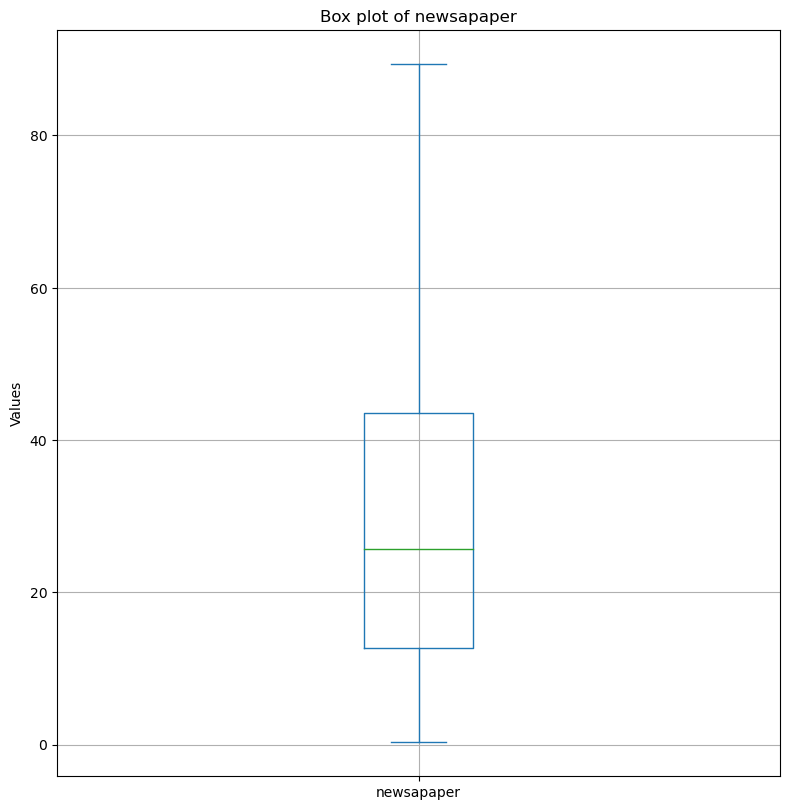

In [23]:
plt.figure(figsize=(8,8))
data["newsapaper"].plot(kind="box")
plt.ylabel("Values")
plt.tight_layout()
plt.title(f"Box plot of newsapaper")
plt.grid()
plt.show()

In [24]:
snehal_corr=data.corr()
snehal_corr

,srno,tv,radio,newsapaper,sales
srno,1.000000,0.028934,-0.106577,-0.133317,-0.081493
tv,0.028934,1.000000,0.048973,0.052042,0.721132
radio,-0.106577,0.048973,1.000000,0.345894,0.566254
newsapaper,-0.133317,0.052042,0.345894,1.000000,0.209691
sales,-0.081493,0.721132,0.566254,0.209691,1.000000


<Axes: >

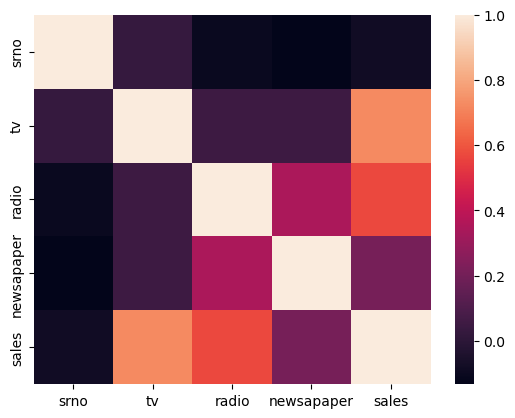

In [25]:
sns.heatmap(snehal_corr)

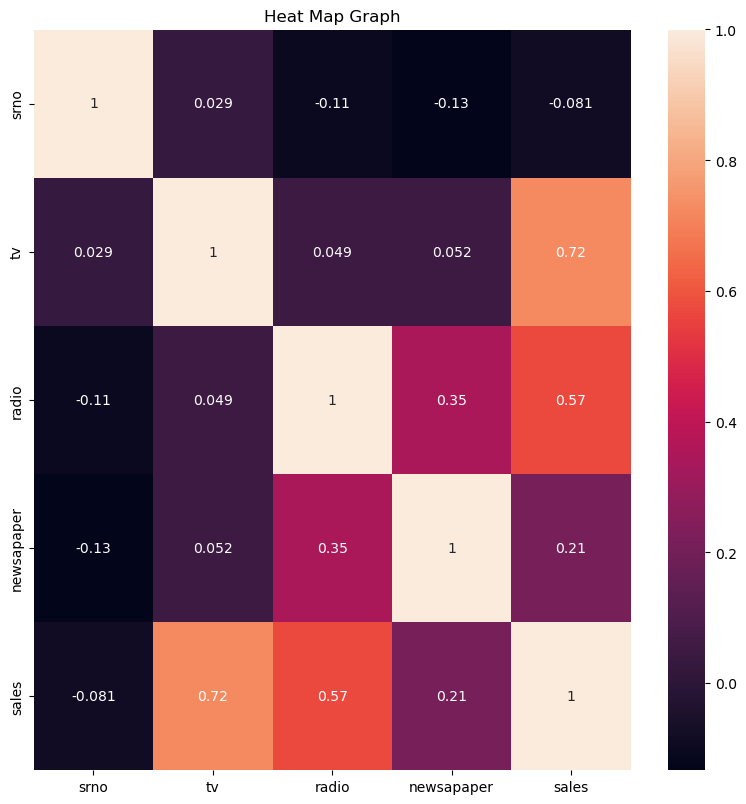

In [26]:
plt.figure(figsize=(8,8))
sns.heatmap(snehal_corr,annot=True)
plt.tight_layout()
plt.title(f"Heat Map Graph")
plt.show()

In [27]:
data.head()

,srno,tv,radio,newsapaper,sales
0,1.0,230.1,37.8,69.2,22.1
1,2.0,44.5,39.3,45.1,10.4
2,3.0,17.2,45.9,69.3,9.3
3,4.0,151.5,41.3,58.5,18.5
4,5.0,180.8,10.8,58.4,12.9


In [28]:
x=data.drop(["srno","sales"],axis=1)
x

,tv,radio,newsapaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [29]:
y=data["sales"]
y


0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123,shuffle=True)
print(f"x training{x_train.shape}")
print(f"y training{y_train.shape}")
print(f"x_testing{x_test.shape}")
print(f"y testing{y_test.shape}")

x training(160, 3)
y training(160,)
x_testing(40, 3)
y testing(40,)


In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model_lr =LinearRegression()
model_lr

LinearRegression()

In [34]:
#train model
model_lr.fit(x_train,y_train)

LinearRegression()

In [35]:
y_pred=model_lr.predict(x_test)
y_pred


array([12.51762221,  6.99583915, 16.04937138, 10.38152223, 14.33119314,
       20.17626667, 12.45622402, 19.92311234, 14.92849937, 11.0252406 ,
       10.57638811, 20.79044845,  7.00280714,  6.67022021,  4.19831788,
       11.58071471, 13.10396909, 15.63103608,  8.40906182, 17.91953532,
        8.25458738, 11.96975993, 11.50136367,  7.90619426, 22.23303435,
       11.00654321, 10.70108993, 15.19808416, 10.38334806, 20.55121594,
        9.91692191, 20.89420304, 23.67478202,  7.44650131, 15.04690998,
       19.11237423, 18.26783096, 19.78075083, 16.35162687,  9.93643705])

In [36]:
model_lr.predict([[120,56,78]])


array([19.09527884])

In [37]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [38]:
mse=mean_squared_error(y_test,y_pred)
print(f"mean square error is {mse}")
rmse=sqrt(mse)
print(f"Root mean squared error is{rmse}")

mean square error is 2.2450272500138957
Root mean squared error is1.4983414997969908


In [39]:
from sklearn.metrics import r2_score

In [40]:
r_squared=r2_score(y_test,y_pred)
print (f"R SQUARED IS {r_squared}")

R SQUARED IS 0.9275042155822826


In [41]:
# y=mx+c c= constant
print(f"Constant Value is {model_lr.intercept_}")


Constant Value is 3.661776857113651


In [42]:
print(f"slope m1,m2, and m3{model_lr.coef_}")

slope m1,m2, and m3[ 0.04197297  0.19052658 -0.0034967 ]


# sales(y)=0.041* tv+0.190* radio+(-0.0034)* newsapaer+3.6617(c)

In [45]:
import pickle
pickle.dump(model_lr,open("mymodel.pkl","wb"))